In [2]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
from sklearn.datasets import load_boston # 보스턴 주택가격 데이터셋 로딩을 위한 패키지

# 보스턴 주택가격 데이터셋 로딩
boston = load_boston()

# 데이터셋의 형태
print(boston.data.shape)
print(type(boston.data))
print(boston.data[:3])

(506, 13)
<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# 데이터셋에 대한 설명
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

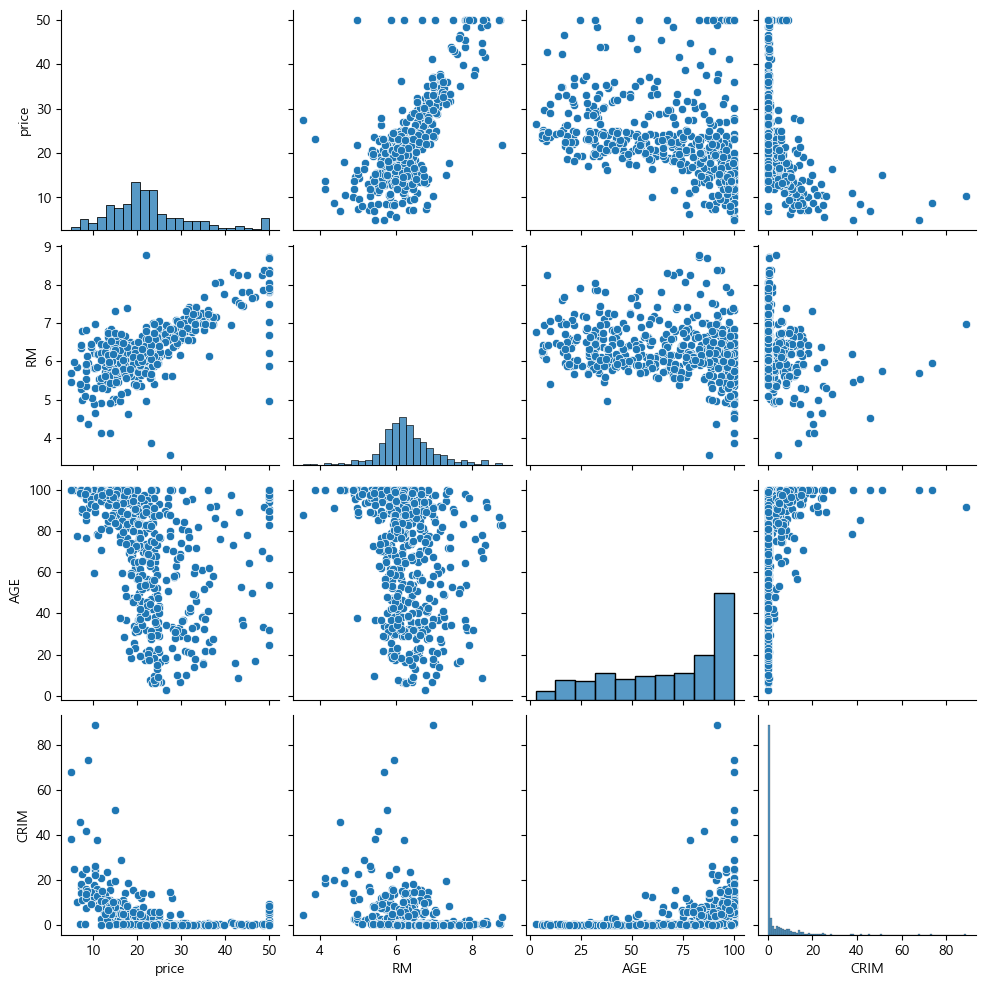

In [5]:
# 회귀분석 : 단답형
# 분류 : 선택형
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["price"] = boston.target # 주택가격

# 산점도 행렬 (RM 방의 갯수, AGE 노후화, CRIM 범죄율)
sns.pairplot(df[["price", "RM", "AGE", "CRIM"]])
plt.show()

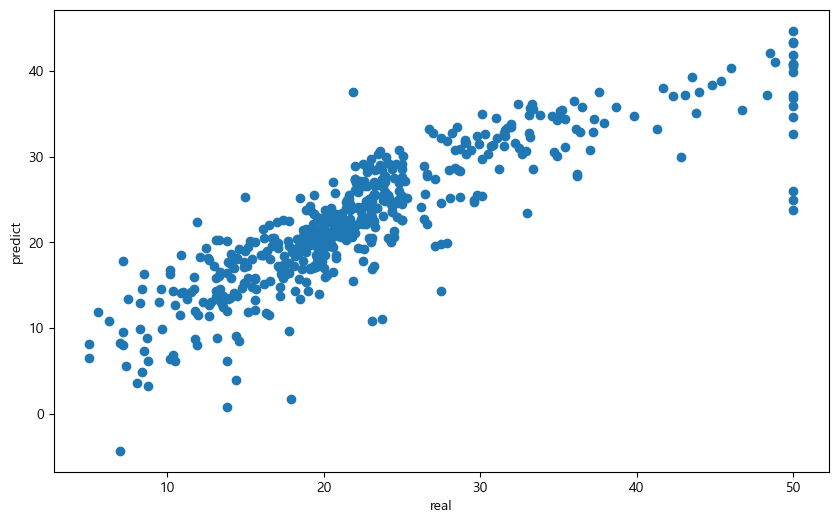

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.figure(figsize=(10, 6))
plt.scatter(boston.target, predicted)
plt.xlabel("real")
plt.ylabel("predict")
plt.show()

In [7]:
# 13개의 필드, 특성끼리 곱하여 데이터 확장
# 범죄율, 고속도로 접근성 => 범죄율과 고속도로 접근성의 곱도 계산
# 13개의 특성을 확장하여 91개의 특성을 더하여 총 104개
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shapr: {}".format(X.shape))

X.shapr: (506, 104)


c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1) # axis=1 가로 방향 연결
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [10]:
from sklearn.model_selection import train_test_split

# 데이터셋을 나눔 (학습용:검증용 = 7:3)
# random_state : 난수 발생을 위한 seed 의 인자값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_test, y_test)

In [11]:
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.6660753597375741
검증용: 0.7577098620280153


In [12]:
# 상관계수
coef = model.coef_

# 절편
intercept = model.intercept_

print(coef)
print(intercept)
# 범죄율이 한단위 증가하면 집값은 약 153 달러 하락
# 찰스강의 경계에 위치한 경우 집값은 약 1622 달러 상승
# 방갯수가 한단위 증가하면 집값은 약 3352 달러 상승
# 재산세율이 한단위 증가하면 집값은 약 1223 하락

[[-9.73194471e-02  3.54444553e-03  1.13688762e-01  4.33912887e+00
  -2.56416225e+01  4.88117109e+00 -1.27299087e-02 -1.30378795e+00
   3.84229387e-01 -1.24864824e-02 -1.24418692e+00 -5.66022651e-03
  -5.03125977e-01]]
[43.65571701]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


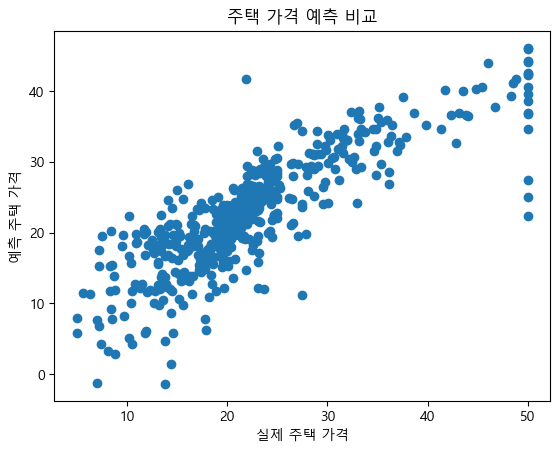

In [13]:
pred = model.predict(boston.data)

plt.scatter(boston.target, pred)
plt.xlabel("실제 주택 가격")
plt.ylabel("예측 주택 가격")
plt.title("주택 가격 예측 비교")
plt.show()

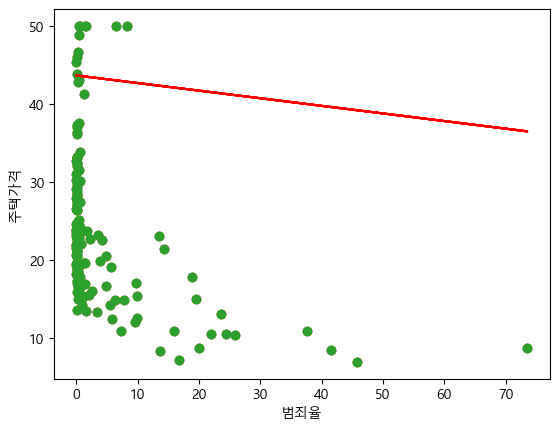

In [17]:
#산점도 그리기
plt.scatter(X_test["CRIM"], y_test)

#회귀선 그리기
plt.plot(X_test["CRIM"], coef[0][0] * X_test["CRIM"] + intercept, c="red")
plt.xlabel("범죄율")
plt.ylabel("주택가격")
plt.show()

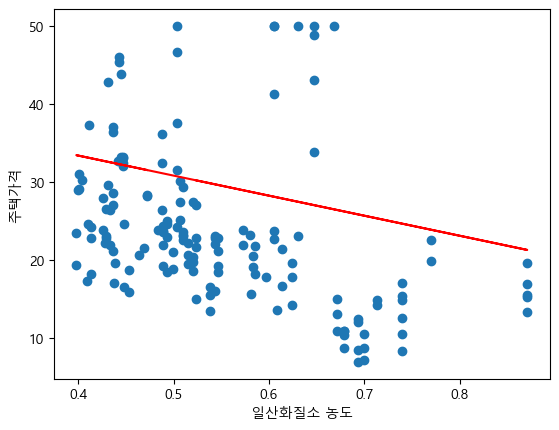

In [18]:
#산점도 그리기
plt.scatter(X_test["NOX"],y_test)

#회귀선 그리기
plt.plot(X_test["NOX"], coef[0][4]*X_test["NOX"] +intercept, c="red")
plt.xlabel("일산화질소 농도")
plt.ylabel("주택가격")
plt.show()

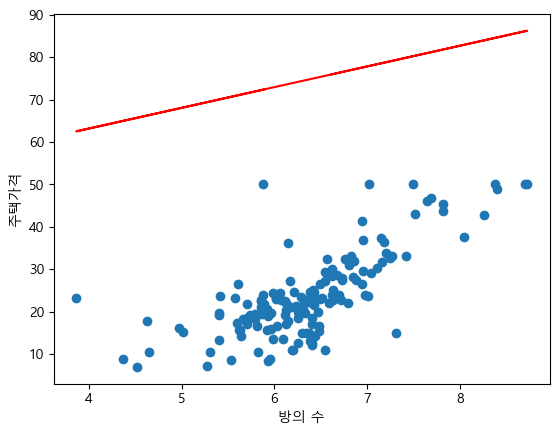

In [19]:
#산점도 그리기
plt.scatter(X_test["RM"],y_test)

#회귀선 그리기
plt.plot(X_test["RM"], coef[0][5]*X_test["RM"] +intercept, c="red")
plt.xlabel("방의 수")
plt.ylabel("주택가격")
plt.show()

In [21]:
import pandas as pd
import statsmodels.api as sm

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print("회귀계수\n",result_boston2.params)
print("R-squared\n",result_boston2.rsquared) #회귀모델의설명력 95.8%의 설명력
print("P values\n",result_boston2.pvalues)

회귀계수
 CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64
R-squared
 0.9591890143535311
P values
 CRIM       7.197130e-03
ZN         7.762640e-04
INDUS      9.497886e-01
CHAS       1.689461e-03
NOX        3.935067e-01
RM         1.179476e-61
AGE        5.989795e-01
DIS        1.016889e-06
RAD        1.064354e-02
TAX        1.698772e-02
PTRATIO    3.925055e-04
B          5.266943e-08
LSTAT      2.142519e-15
dtype: float64


In [22]:
#요약 결과 출력
print(result_boston2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:45:25   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

후진제거법

- 변수들 중 탈락시킬 변수 선정

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

- pvalue가 0.05보다 큰 값을 탈락시킨다.

INDUS(2) NOX(4) AGE(6)

INDUS > AGE > NOX

In [23]:
# 변수들의 상관관계
# 상관계수 행렬
dfX.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


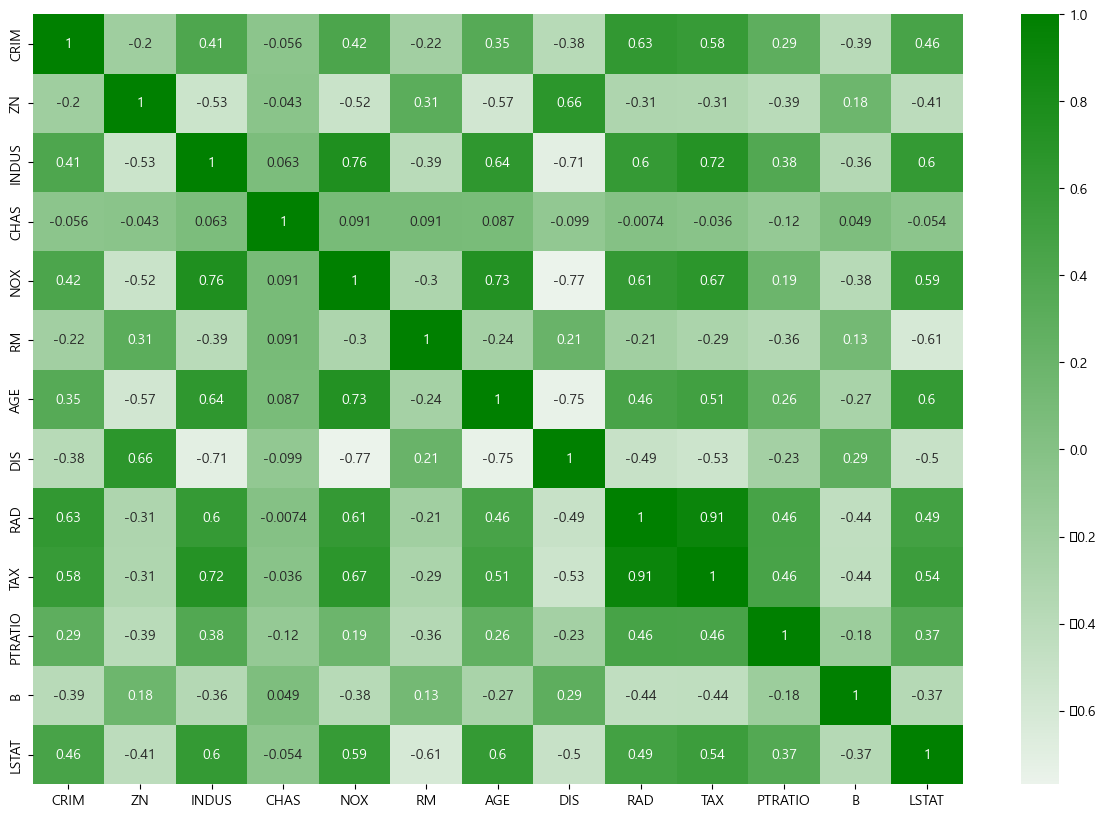

In [24]:
import seaborn as sns
plt.figure(figsize=(15, 10))
cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show()

In [25]:
# 다중공선성은 VIF 값으로 확인할 수 있다.
# 다른 변수에 의존적일수록 VIF가 커진다.
# 독립변수가 서로 의존하게 되면 과적합화 문제가 발생하여 모델의 안정성이 떨어질 수 있다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["변수"] = dfX.columns
vif = vif.sort_values("VIF").reset_index(drop=True)
vif # vif값은 작을수록 좋은데 5보다 큰 값은 다중공선성이 큰 변수라고 볼 수 있다.

,VIF,변수
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


In [26]:
# INDUS 필드 제거
arr = boston.data[:,[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns={"MEDV"})

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

print("회귀계수\n",result_boston3.params)
print("R-squared\n",result_boston3.rsquared) #회귀모델의설명력 95.8%의 설명력
print("P values\n",result_boston3.pvalues)

회귀계수
 CRIM      -0.092808
ZN         0.048813
CHAS       2.848208
NOX       -2.927475
RM         5.931793
AGE       -0.007274
DIS       -0.965462
RAD        0.172304
TAX       -0.009504
PTRATIO   -0.393025
B          0.014914
LSTAT     -0.416504
dtype: float64
R-squared
 0.9591886857507301
P values
 CRIM       7.145593e-03
ZN         6.970046e-04
CHAS       1.615787e-03
NOX        3.640270e-01
RM         1.728076e-63
AGE        5.983475e-01
DIS        4.876021e-07
RAD        7.456777e-03
TAX        7.315910e-03
PTRATIO    3.411125e-04
B          4.819839e-08
LSTAT      1.735166e-15
dtype: float64


In [27]:
# 요약 결과 출력
print(result_boston3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:02:35   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3072.
Df Residuals:                     494   BIC:                                      3122.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
# AGE 필드 제거
arr=boston.data[:,[0,1,3,4,5,7,8,9,10,11,12]]
arr

dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

print("회귀계수\n",result_boston3.params)
print("R-squared\n",result_boston3.rsquared) #회귀모델의 설명력 95.8%의 설명력
print("P values\n",result_boston3.pvalues)

회귀계수
 CRIM      -0.092765
ZN         0.049751
CHAS       2.824757
NOX       -3.394518
RM         5.897915
DIS       -0.929765
RAD        0.174267
TAX       -0.009552
PTRATIO   -0.395069
B          0.014857
LSTAT     -0.425399
dtype: float64
R-squared
 0.9591657310753959
P values
 CRIM       7.129382e-03
ZN         4.930894e-04
CHAS       1.727705e-03
NOX        2.733719e-01
RM         3.183764e-65
DIS        2.125823e-07
RAD        6.677787e-03
TAX        6.963545e-03
PTRATIO    3.119472e-04
B          5.160147e-08
LSTAT      9.269373e-18
dtype: float64


In [29]:
#요약 결과 출력
print(result_boston3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:03:33   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3116.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
# NOX 필드 제거
arr=boston.data[:,[0,1,3,5,7,8,9,10,11,12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

print("회귀계수\n",result_boston3.params)
print("R-squared\n",result_boston3.rsquared) #회귀모델의 설명력 95.8%의 설명력
print("P values\n",result_boston3.pvalues)

회귀계수
 CRIM      -0.091081
ZN         0.051292
CHAS       2.718498
RM         5.714502
DIS       -0.866551
RAD        0.182790
TAX       -0.010896
PTRATIO   -0.400242
B          0.014532
LSTAT     -0.449224
dtype: float64
R-squared
 0.9590665393503892
P values
 CRIM       8.185236e-03
ZN         3.086919e-04
CHAS       2.415760e-03
RM         5.457365e-82
DIS        3.117713e-07
RAD        4.175079e-03
TAX        1.051013e-03
PTRATIO    2.577209e-04
B          8.276880e-08
LSTAT      1.047574e-23
dtype: float64


In [32]:
#요약 결과 출력
print(result_boston3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:04:08   Log-Likelihood:                         -1524.5
No. Observations:                 506   AIC:                                      3069.
Df Residuals:                     496   BIC:                                      3111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
# PTRATIO 필드를 제거하니 오히려 설명력이 95.7%로 약간 떨어지므로
# PTRATIO 필드부터는 제거하지 않는다.
arr=boston.data[:,[0,1,3,5,7,8,9,11,12]]
arr
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD','TAX', 'B', 'LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

print("회귀계수\n",result_boston3.params)
print("R-squared\n",result_boston3.rsquared) #회귀모델의 설명력 95.7%의 설명력
print("P values\n",result_boston3.pvalues)

회귀계수
 CRIM    -0.093019
ZN       0.072284
CHAS     2.980292
RM       5.164429
DIS     -1.124666
RAD      0.186820
TAX     -0.014447
B        0.011811
LSTAT   -0.511810
dtype: float64
R-squared
 0.9579482696065791
P values
 CRIM     7.645825e-03
ZN       5.230084e-08
CHAS     9.932030e-04
RM       2.146638e-96
DIS      9.697344e-13
RAD      3.831347e-03
TAX      8.010777e-06
B        6.871124e-06
LSTAT    2.127561e-33
dtype: float64


In [34]:
#요약 결과 출력
print(result_boston3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1258.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:04:58   Log-Likelihood:                         -1531.4
No. Observations:                 506   AIC:                                      3081.
Df Residuals:                     497   BIC:                                      3119.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------